In [1]:
%load_ext autoreload

In [9]:
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
from tqdm.notebook import tqdm

sys.path.append('..')
from nld_utils import *

In [4]:
fs = 1000
dt = 1/fs

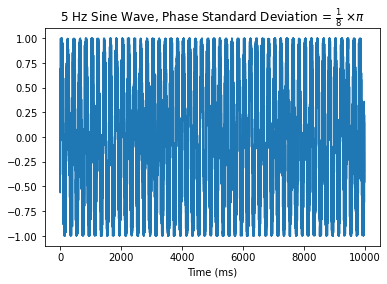

In [5]:
freq = 5 # Hz
duration = 10 # s
length = int(duration*fs)

# construct sin wave
sin_wave = np.zeros(length)
phase_sd = np.pi/8
for t in range(length):
    phase = np.random.randn()*phase_sd
    sin_wave[t] = np.sin(2*np.pi*t*dt*freq + phase)
plt.plot(sin_wave)
plt.xlabel("Time (ms)")
integer_ratio = (phase_sd/np.pi).as_integer_ratio()
plt.title(fr"{freq} Hz Sine Wave, Phase Standard Deviation = " + r"$\frac{%d}{%d}$" % integer_ratio + r" $\times \pi$")
plt.show()

In [56]:
duration = 10 # s
phase_sd = np.pi/8
method= 'nolds'
# freqs = [0.5, 1, 2, 3, 4, 5, 8, 10, 15, 20]
freqs = [5]

length = int(duration*fs)

results_freq = []

for freq in tqdm(freqs):
    # construct sin wave
    sin_wave = np.zeros(length)
    for t in range(length):
        phase = np.random.randn()*phase_sd
        sin_wave[t] = np.cos(2*np.pi*t*dt*freq + phase)
    signal_in = sin_wave
#     signal_in = np.random.randn(length)*freq

    p = 1
    r = 10
    theiler_window = int((1/freq)*fs) # the period (was 10 before)
    maxt = 300

    ret = lyapunov_analysis(signal_in, nlags=min(int(len(signal_in)/2), 1000), max_m=10, p=p, r=r, theiler_window=theiler_window, maxt=maxt, method=method)
    ret['signal_in'] = signal_in
    results_freq.append(ret)

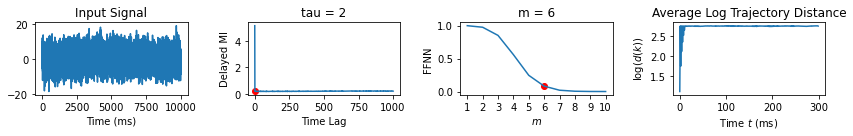

In [61]:
plt.figure(figsize=(12, int(4*len(freqs)/2)))
i = 1
for ret in results_freq:
    plt.subplot(len(freqs), 4, i)
    plt.plot(ret['signal_in'])
    plt.xlabel(r'Time (ms)')
    plt.title('Input Signal')
    i +=1
    
    plt.subplot(len(freqs), 4, i)
    plt.plot(ret['delayed_mi'])
    plt.title(f"tau = {ret['tau']}")
    plt.scatter(ret['tau'], ret['delayed_mi'][ret['tau']], c='red')
    plt.xlabel(r'Time Lag')
    plt.ylabel(r'Delayed MI')
    i +=1

    plt.subplot(len(freqs), 4, i)
    plt.plot(ret['m_vals'], ret['fraction_fnn'])
    plt.title(f"m = {ret['m']}")
    plt.scatter(ret['m'], ret['fraction_fnn'][ret['m'] - 1], c='red')
    plt.xticks(ret['m_vals'], ret['m_vals'])
    plt.xlabel(r'$m$')
    plt.ylabel(r'FFNN')
    i +=1

    plt.subplot(len(freqs), 4, i)
    ret['t'] = np.arange(len(ret['d']))
    plt.plot(ret['t'], ret['d'])
    plt.title(f"Average Log Trajectory Distance")
    plt.xlabel(r'Time $t$ (ms)')
    plt.ylabel(r'log($d(k)$)')
    i +=1
plt.tight_layout()
plt.show()

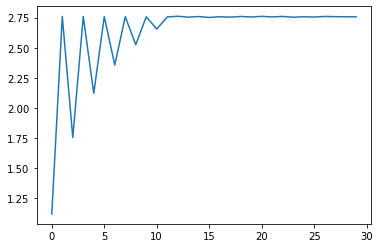

In [60]:
plt.plot(ret['d'][:30])

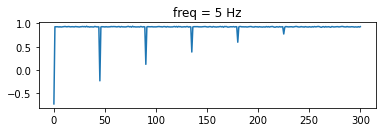

In [43]:
plt.figure(figsize=(10, 8))
i = 1
for ret in results_freq:
    plt.subplot(5, 2, i)
    plt.plot(ret['d'])
    plt.title(f"freq = {freqs[i-1]} Hz")
    i += 1
plt.tight_layout()
plt.show()